In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
mat_file_path = r"C:\Users\ADMIN\Desktop\NB-DAI\nyu_depth_v2_labeled.mat"

In [4]:
def save_point_cloud_to_ply(depth, filename):
    # Get the shape of the depth map
    height, width = depth.shape
    
    # Create a meshgrid of (x, y) coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    
    # Flatten the arrays to create a list of points
    x = -1  * x.flatten()
    y = y.flatten()
    z = depth.flatten()
    z = 8 * z
    z = z * -1
    # Combine x, y, z coordinates into a single array
    points = np.vstack((x, y, z)).T
    depth =255- depths[index]
    plt.subplot(1, 2, 2)
    plt.imshow(depth, cmap='plasma')
    plt.title('Depth Map')
    #plt.show()
    
    # Save the point cloud to a PLY file
    with open(filename, 'w') as f:
        # Write the header
        f.write("ply\n")
        f.write("format ascii 1.0\n")
        f.write(f"element vertex {len(points)}\n")
        f.write("property float x\n")
        f.write("property float y\n")
        f.write("property float z\n")
        f.write("end_header\n")
        
        # Write the points
        for point in points:
            f.write(f"{point[0]} {point[1]} {point[2]}\n")


Saved point cloud for image 1 to D:\ply_final\one\point_cloud_1.ply


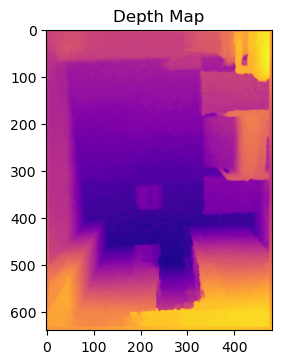

In [5]:
import os
output = r"D:\ply_final\one"
try:
    with h5py.File(mat_file_path, 'r') as mat_file:
        for index in range(0,1):
            # Save the point cloud to a PLY file
            ply_filename = os.path.join(output, f"point_cloud_{index + 1}.ply")
            depths = np.array(mat_file['depths'])
            save_point_cloud_to_ply(depths[index], ply_filename)
            print(f"Saved point cloud for image {index + 1} to {ply_filename}")

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import os
def save_point_cloud_as_image(depth,filename):
    # Get the shape of the depth map
    height, width = depth.shape
    
    # Create a meshgrid of (x, y) coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    
    # Flatten the arrays to create a list of points
    x = x.flatten()
    y = y.flatten()
    z =  depth.flatten()
    
    # Create a figure for the 2D point cloud
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the 2D point cloud
    ax.scatter(x, y, z, c=z, cmap='plasma', marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')
    plt.title('2D Point Cloud')
    plt.savefig(filename)
    plt.close()

In [ ]:
output_folder = r"D:\output_image"
try:
    with h5py.File(mat_file_path, 'r') as mat_file:
        for index in range(400000):
            # Save the point cloud as an image
            image_filename = os.path.join(output_folder, f"point_cloud_{index + 1}.png")
            save_point_cloud_as_image(depths[index], image_filename)
            print(f"Saved point cloud image for image {index + 1} to {image_filename}")

except Exception as e:
    print(f"An error occurred: {e}")